Mounting G-Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

#Importing Necessary Libralies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Reading Dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data_Sets/kidney_disease.csv")

In [ ]:
#Displaying all columns
pd.set_option('display.max_columns',None)

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.info()#for seeing data types of columns and checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df.isna().mean()*100 #Missing Values Percentage

,0
id,0.00
age,2.25
bp,3.00
sg,11.75
al,11.50
su,12.25
rbc,38.00
pc,16.25
pcc,1.00
ba,1.00


In [ ]:
df.duplicated().sum()#Duplicate Rows Count

0

In [ ]:
df.describe()#to Examine Outliers

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


#Data Cleaning

In [ ]:
#Dropping id column
df=df.iloc[:,1:]

In [ ]:
for cols in df.columns:

  print("*"*50,cols,df[cols].dtype,"*"*50)
  print(df[cols].unique())

************************************************** age float64 **************************************************
[48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
************************************************** bp float64 **************************************************
[ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
************************************************** sg float64 **************************************************
[1.02  1.01  1.005 1.015   nan 1.025]
************************************************** al float64 **************************************************
[ 1.  4.  2.  3.  0. nan  5.]
************************************************** su float64 **********************************************

##These Columns Have Some Mistakes and they are be rectified in further process
df["pcv"] having '\t43','\t?'

df["wc"] having '\t8400','\t?','\t6200'

df["rc"] having '\t?'

df["dm"] having ' yes','\tno','\tyes'

df["cad"] having '\tno'

df["classification"] having 'ckd\t'

In [ ]:
df["pcv"]=df["pcv"].apply(lambda x:43 if x=="\t43" else (np.nan if x=="\t?" else x ))
df["wc"]=df["wc"].apply(lambda x:8400 if x=="\t8400" else (np.nan if x=="\t?" else (6200 if x=="\t6200" else x)))
df["rc"]=df["rc"].apply(lambda x: np.nan if x=='\t?' else x)
df["dm"]=df["dm"].apply(lambda x:"yes" if x==" yes" else ("no" if x=="\tno" else ("yes" if x=="\tyes" else x)))
df["cad"]=df["cad"].apply(lambda x: "no" if x=='\tno' else x)
df["classification"]=df["classification"].apply(lambda x: "ckd" if x=='ckd\t' else x)

In [ ]:
#changing datatypes
for cols in ["wc","pcv","rc"]:
  df[cols] = df[cols].astype(float)

In [ ]:
df.dtypes

,0
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object
bgr,float64


#EDA

##Handling Null Values

In [ ]:
df_cat=df.copy()
df_num=df.copy()
for cols in df.columns:
  if df[cols].dtype=="object":
    df_num.drop(columns=[cols],inplace=True)
  else:
    df_cat.drop(columns=[cols],inplace=True)

Dealing Numerical Data

In [ ]:
for cols in df_num.columns:
  if df_num[cols].nunique()<=30:
    print("*"*50,cols,"*"*50)
    print(df_num[cols].value_counts())

************************************************** bp **************************************************
bp
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: count, dtype: int64
************************************************** sg **************************************************
sg
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: count, dtype: int64
************************************************** al **************************************************
al
0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: count, dtype: int64
************************************************** su **************************************************
su
0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: count, dtype: int64


For above columns one certain value is repeted most of the times so its better to use mode in filling null values

In [ ]:
for cols in df_num.columns:
  if df_num[cols].nunique()<=30:
    df_num[cols].fillna(df_num[cols].mode()[0],inplace=True)

In [ ]:
for cols in df_num.columns:
  if df_num[cols].nunique()>30:
    print("*"*50,cols,df_num[cols].nunique(),"*"*50)
    print(df_num[cols].value_counts())

************************************************** age 76 **************************************************
age
60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: count, Length: 76, dtype: int64
************************************************** bgr 146 **************************************************
bgr
99.0     10
93.0      9
100.0     9
107.0     8
131.0     6
         ..
288.0     1
182.0     1
84.0      1
256.0     1
226.0     1
Name: count, Length: 146, dtype: int64
************************************************** bu 118 **************************************************
bu
46.0     15
25.0     13
19.0     11
40.0     10
50.0      9
         ..
176.0     1
145.0     1
92.0      1
322.0     1
186.0     1
Name: count, Length: 118, dtype: int64
************************************************** sc 84 **************************************************
sc
1.2     40
1.1     24
0.5     23
1.0     23
0.9  

For above columns values are evenly distributed and also we have outliers so its better to use median in filling null values

In [ ]:
for cols in df_num.columns:
  if df_num[cols].nunique()>30:
      df_num[cols].fillna(df_num[cols].median(),inplace=True)

In [ ]:
df_num.isna().sum()

,0
age,0
bp,0
sg,0
al,0
su,0
bgr,0
bu,0
sc,0
sod,0
pot,0


Dealing categarical Data

For these columns one certain value is repeted most of the times so its better to use mode in filling null values

In [ ]:
for cols in df_cat.columns:
  print(df_cat[cols].value_counts())

rbc
normal      353
abnormal     47
Name: count, dtype: int64
pc
normal      324
abnormal     76
Name: count, dtype: int64
pcc
notpresent    358
present        42
Name: count, dtype: int64
ba
notpresent    378
present        22
Name: count, dtype: int64
htn
no     253
yes    147
Name: count, dtype: int64
dm
no     263
yes    137
Name: count, dtype: int64
cad
no     366
yes     34
Name: count, dtype: int64
appet
good    318
poor     82
Name: count, dtype: int64
pe
no     324
yes     76
Name: count, dtype: int64
ane
no     340
yes     60
Name: count, dtype: int64
classification
ckd       250
notckd    150
Name: count, dtype: int64


In [ ]:
for cols in df_cat.columns:
  df_cat[cols].fillna(df_cat[cols].mode()[0],inplace=True)

##Hadling Outliers

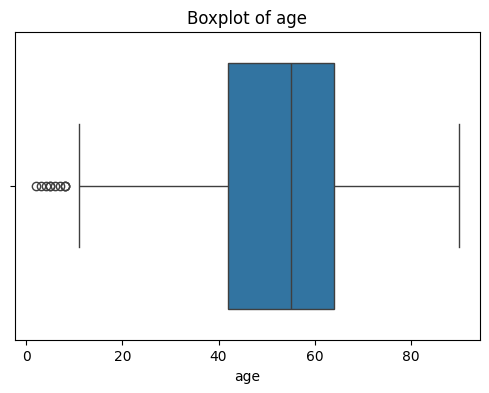

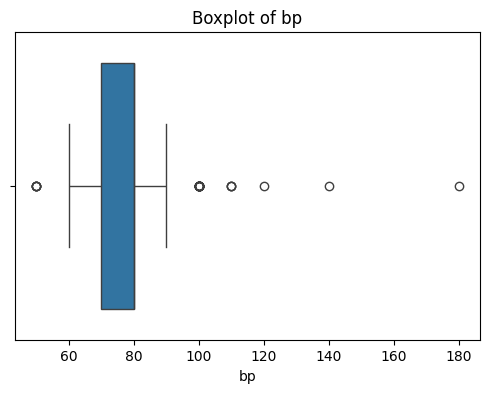

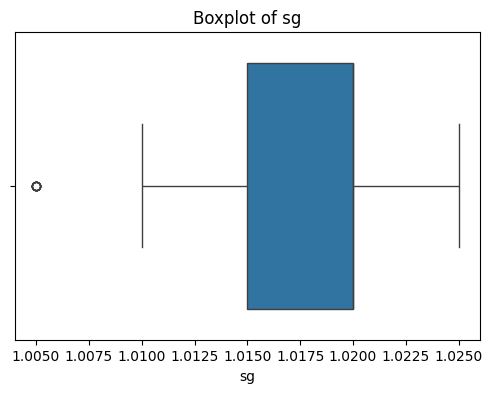

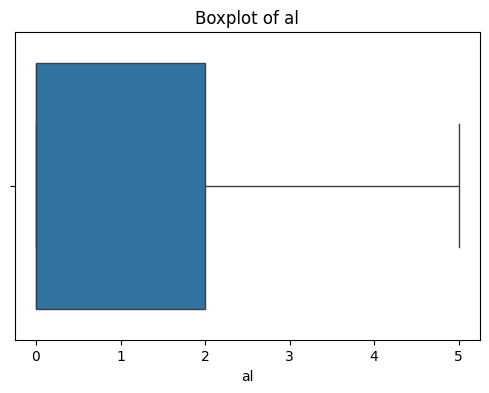

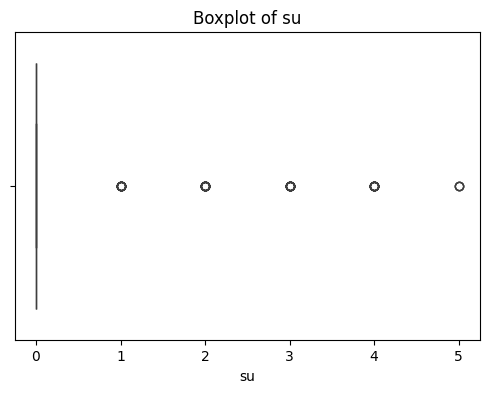

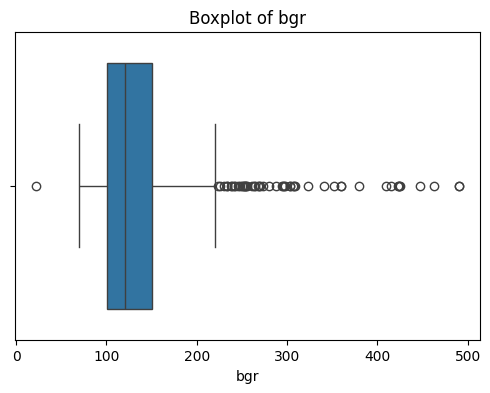

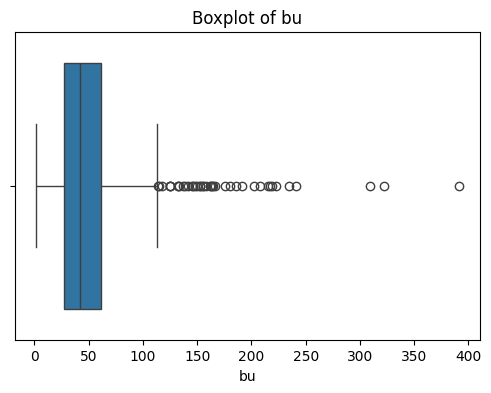

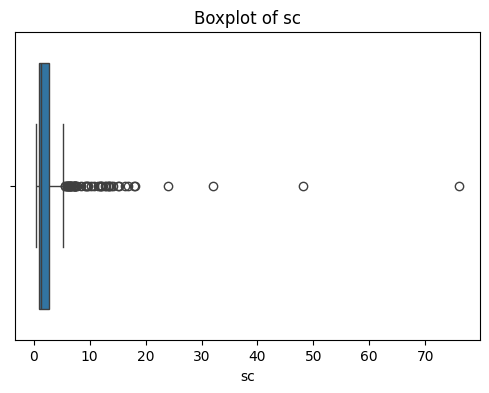

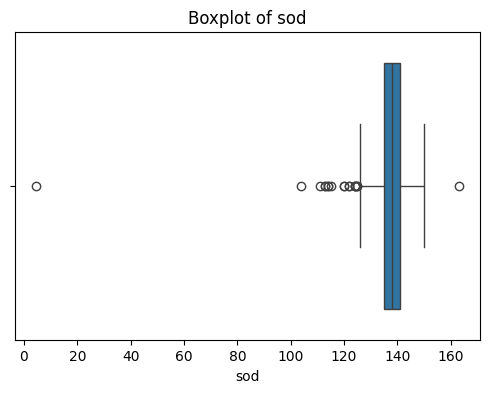

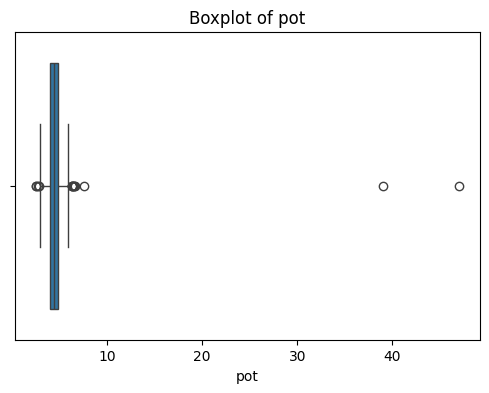

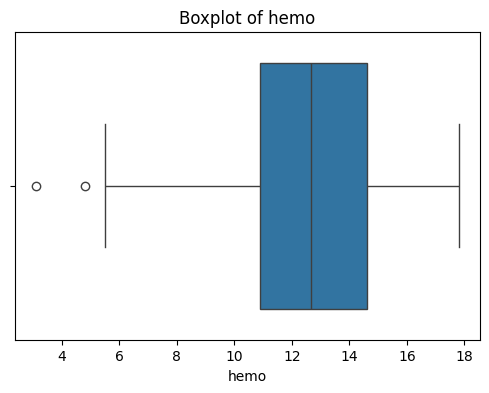

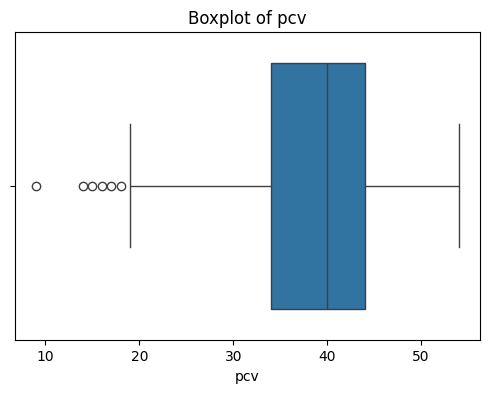

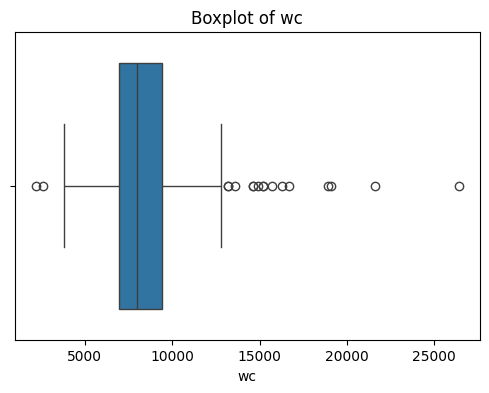

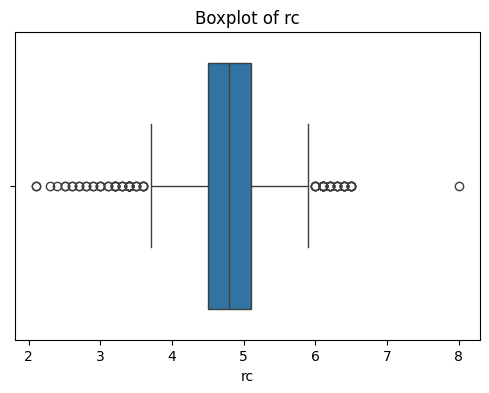

In [ ]:
for cols in df_num.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_num[cols])
    plt.title(f"Boxplot of {cols}")
    plt.show()

Because Of These values are related to health domain so we can not modify the data even though it having outliers

##Preprocessing the data

In [ ]:
df_enc=pd.get_dummies(df_cat,drop_first=True).astype(int)

In [ ]:
scalar=MinMaxScaler()
scaled_values=scalar.fit_transform(df_num)

In [ ]:
df_scaled = pd.DataFrame(scaled_values, columns=df_num.columns)

In [ ]:
df_1=pd.concat([df_scaled,df_enc],axis=1)

In [ ]:
df_1=df_1.rename(columns={"rbc_normal":"rbc","pc_normal":"pc","pcc_present":"pcc","ba_present":"ba","htn_yes":"htn",
              "dm_yes":"dm","cad_yes":"cad","appet_poor":"appet","pe_yes":"pe","ane_yes":"ane","classification_notckd":"classification"})

In [ ]:
x=df_1.drop(columns=["classification"])
y=df_1["classification"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, stratify=y)


#Building Maching Learning (Traditional Algorithm)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# evaluation matrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
    VotingClassifier(
        estimators=[
            ('logit', LogisticRegression()),
            ('dtree', DecisionTreeClassifier()),
            ('rforest', RandomForestClassifier()),
            ('xgboost', XGBClassifier()),
            ('knn', KNeighborsClassifier()),
            ('svm', SVC()),
            ('nbt', GaussianNB())
        ],
        voting='hard'
    )
]

In [ ]:
scores = {}
for model in models:
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    scores[type(model).__name__] = {"Train Accuracy": train_accuracy, "Test Accuracy": test_accuracy}

In [ ]:
accuracy_table = pd.DataFrame.from_dict(scores, orient="index").reset_index()
accuracy_table.rename(columns={"index": "Model"}, inplace=True)

In [ ]:
accuracy_table

,Model,Train Accuracy,Test Accuracy
0,LogisticRegression,0.986667,0.95
1,DecisionTreeClassifier,1.000000,0.95
2,RandomForestClassifier,1.000000,0.98
3,XGBClassifier,1.000000,0.96
4,KNeighborsClassifier,0.990000,0.94
5,SVC,0.990000,0.97
6,GaussianNB,0.970000,0.95
7,VotingClassifier,0.996667,0.98


Voting Classifier and Random Forest Classifier gives best Accuracy So i am going with one of them

In [ ]:
model_evc=VotingClassifier(
        estimators=[
            ('logit', LogisticRegression()),
            ('dtree', DecisionTreeClassifier()),
            ('rforest', RandomForestClassifier()),
            ('xgboost', XGBClassifier()),
            ('knn', KNeighborsClassifier()),
            ('svm', SVC()),
            ('nbt', GaussianNB())],
        voting='hard'
    )
model_evc.fit(x_train, y_train)
y_train_pred = model_evc.predict(x_train)
y_test_pred = model_evc.predict(x_test)
print("Training Score",round(accuracy_score(y_train, y_train_pred),2))
print("Testing Score",accuracy_score(y_test, y_test_pred))

Training Score 1.0
Testing Score 0.98


##Cross Validation

In [ ]:
cvs=cross_val_score(model_evc,x_train,y_train,cv=10)
print("Training Mean",round(cvs.mean(),2))

Training Mean 0.99


In [ ]:
cvs#scores at each fold

array([1.        , 0.96666667, 0.96666667, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

##Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        63
           1       0.95      1.00      0.97        37

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



##Confussion Matrix

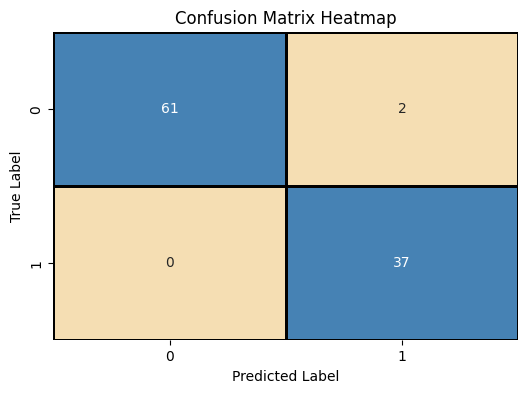

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
colors = ["#F5DEB3", "#4682B4"]
cmap = sns.color_palette(colors, as_cmap=True)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False, linewidths=1, linecolor='black')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()